<a href="https://colab.research.google.com/github/harshdhiman7/GenerativeModeling/blob/main/Autoencoder_MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()  # Output values between 0 and 1
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.view(-1, 1, 28, 28)

In [ ]:
# Hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 10

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 141741822.05it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 85790151.43it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41931265.82it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3355147.72it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Initialize the autoencoder and optimizer
autoencoder = Autoencoder()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

# Training loop
for epoch in range(epochs):
    for data, _ in train_loader:
        optimizer.zero_grad()
        reconstructions = autoencoder(data)
        loss = criterion(reconstructions, data)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.1623
Epoch [2/10], Loss: 0.1271
Epoch [3/10], Loss: 0.1126
Epoch [4/10], Loss: 0.1032
Epoch [5/10], Loss: 0.1018
Epoch [6/10], Loss: 0.1083
Epoch [7/10], Loss: 0.0880
Epoch [8/10], Loss: 0.0997
Epoch [9/10], Loss: 0.0934
Epoch [10/10], Loss: 0.0896


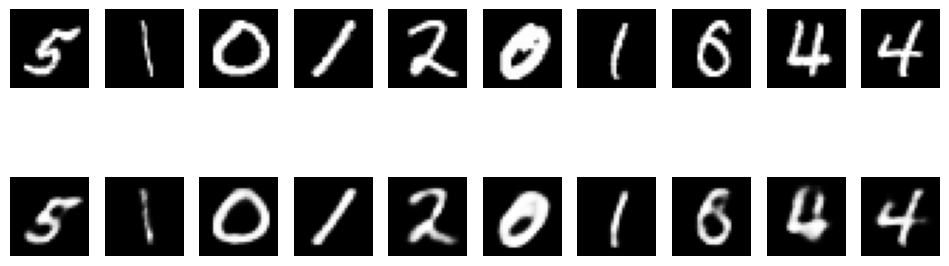

In [ ]:
# Visualize some reconstructed images
data, _ = next(iter(train_loader))
with torch.no_grad():
    reconstructed = autoencoder(data)

# Display original and reconstructed images
fig, axs = plt.subplots(2, 10, figsize=(12, 4))
for i in range(10):
    axs[0, i].imshow(data[i][0], cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(reconstructed[i][0], cmap='gray')
    axs[1, i].axis('off')

plt.show()